In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

2023-09-11 10:04:11.984203: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
tf.__version__

'2.10.0'

In [3]:
# 3.5 新聞分類：多分類問題
# §代碼清單 3-12

from keras.datasets import reuters

#(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000,test_split=0.2)
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)


In [4]:
# === FOR CHECK ===
print('train records : ', len(train_data))
print('test  records : ', len(test_data))
print('\n')
print('train_data[10] :')
print(train_data[10])

train records :  8982
test  records :  2246


train_data[10] :
[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]


In [5]:
# §代碼清單 3-13

word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[10]])

print(decoded_newswire)

? period ended december 31 shr profit 11 cts vs loss 24 cts net profit 224 271 vs loss 511 349 revs 7 258 688 vs 7 200 349 reuter 3


In [6]:
print(train_labels[10])

3


In [7]:
# §代碼清單 3-14

import numpy as np

def vectorize_sequences(sequences, dimension = 10000) :
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences) :
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [8]:
# §代碼清單 3-14 數據編碼 continue ...

def to_one_hot(labels, dimension = 46) :
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels) :
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

# built-in metho in keras
#from keras.utils.np_utils import to_categorical
#one_hot_train_labels = to_categorical(train_labels)
#one_hot_test_labels = to_categorical(test_labels)


In [9]:
# §代碼清單 3-15 模型定義

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))


2023-09-11 10:06:11.996331: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
# §代碼清單 3-16 編譯模型

model.compile(optimizer = 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])


In [11]:
# §代碼清單 3-17 留出驗證集

x_val = x_train[:1000] # for verify (資料)
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000] # for verify (標籤)
partial_y_train = one_hot_train_labels[1000:]


In [12]:
# §代碼清單 3-18 訓練模型

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs = 20,
                   batch_size = 512,
                   validation_data = (x_val, y_val))


Epoch 1/20
16/16 [==============================] - 1s 40ms/step - loss: 2.6912 - accuracy: 0.4672 - val_loss: 1.7548 - val_accuracy: 0.6130
Epoch 2/20
16/16 [==============================] - 0s 22ms/step - loss: 1.4589 - accuracy: 0.6963 - val_loss: 1.3502 - val_accuracy: 0.7070
Epoch 3/20
16/16 [==============================] - 0s 19ms/step - loss: 1.1020 - accuracy: 0.7689 - val_loss: 1.2116 - val_accuracy: 0.7320
Epoch 4/20
16/16 [==============================] - 0s 18ms/step - loss: 0.8795 - accuracy: 0.8176 - val_loss: 1.0736 - val_accuracy: 0.7760
Epoch 5/20
16/16 [==============================] - 0s 18ms/step - loss: 0.7060 - accuracy: 0.8520 - val_loss: 1.0086 - val_accuracy: 0.7900
Epoch 6/20
16/16 [==============================] - 0s 17ms/step - loss: 0.5705 - accuracy: 0.8821 - val_loss: 0.9539 - val_accuracy: 0.8080
Epoch 7/20
16/16 [==============================] - 0s 19ms/step - loss: 0.4668 - accuracy: 0.9022 - val_loss: 0.9583 - val_accuracy: 0.7990
Epoch 8/20
16

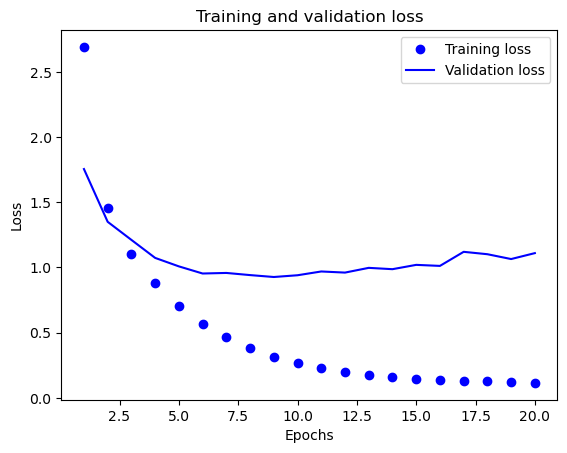

In [13]:
# §代碼清單 3-19 繪製訓練損失和驗證損失

import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


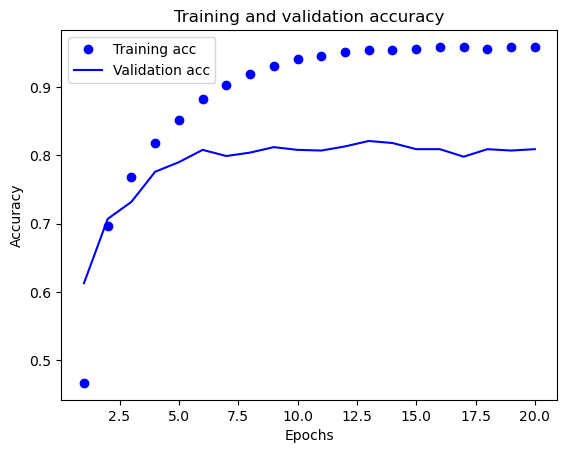

In [14]:
# §代碼清單 3-20 繪製訓練精度和驗證精度

plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [15]:
# §代碼清單 3-21 從頭開始重新訓練一個模型 (p.64)

model = models.Sequential()

model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

model.compile(optimizer = 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])
model.fit(partial_x_train,
         partial_y_train,
         epochs = 9,
         batch_size = 512,
         validation_data = (x_val, y_val))
# x_test, one_hot_test_labels : 一開始讀取資料時，將資料分為訓練資料與測試資料，此2變數即為測試資料
results = model.evaluate(x_test, one_hot_test_labels)


Epoch 1/9
16/16 [==============================] - 1s 35ms/step - loss: 2.6553 - accuracy: 0.5143 - val_loss: 1.7120 - val_accuracy: 0.6510
Epoch 2/9
16/16 [==============================] - 0s 17ms/step - loss: 1.3881 - accuracy: 0.7088 - val_loss: 1.2824 - val_accuracy: 0.7250
Epoch 3/9
16/16 [==============================] - 0s 19ms/step - loss: 1.0285 - accuracy: 0.7771 - val_loss: 1.1149 - val_accuracy: 0.7600
Epoch 4/9
16/16 [==============================] - 0s 17ms/step - loss: 0.8160 - accuracy: 0.8250 - val_loss: 1.0317 - val_accuracy: 0.7780
Epoch 5/9
16/16 [==============================] - 0s 21ms/step - loss: 0.6557 - accuracy: 0.8618 - val_loss: 0.9755 - val_accuracy: 0.7940
Epoch 6/9
16/16 [==============================] - 0s 22ms/step - loss: 0.5292 - accuracy: 0.8916 - val_loss: 0.9279 - val_accuracy: 0.8050
Epoch 7/9
16/16 [==============================] - 0s 21ms/step - loss: 0.4321 - accuracy: 0.9119 - val_loss: 0.9099 - val_accuracy: 0.8060
Epoch 8/9
16/16 [===

In [16]:
# === FOR CHECK (p.64, pdf.81) ===
print(results)

[1.0252312421798706, 0.777827262878418]


In [17]:
# p.64 
import copy 
test_labels_copy = copy.copy(test_labels)
print(test_labels)
np.random.shuffle(test_labels_copy)
print(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
print(hits_array)
print(np.sum(hits_array))
print(len(test_labels))
float(np.sum(hits_array)) / len(test_labels)

[ 3 10  1 ...  3  3 24]
[ 3  3  4 ... 16 18  3]
[ True False False ... False False False]
475
2246


0.21148708815672307

In [18]:
# §代碼清單 3-22 在新數據上生成預測結果 (p.65)

predictions = model.predict(x_test)

#print(predictions[0].shape)
#print(np.argmax(predictions[0]))

#y_train = np.array(train_labels)
#y_test = np.array(test_labels)

#model.compile(optimizer = 'rmsprop',
#             loss = 'sparse_categorical_crossentropy',
#             metric = ['accuracy'])



71/71 [==============================] - 0s 2ms/step


In [27]:
# §代碼清單 3-22 continue

print("1 = ", predictions[0].shape)
print("2 = ", np.sum(predictions[0]))
print("3 = ", predictions[0])
print("4 = ", len(predictions[0]))
print("5 = ", np.argmax(predictions[0])) # 最大的元素，就是預測類別，即概率最大的類別

1 =  (46,)
2 =  1.0
3 =  [5.7906938e-05 1.8874751e-04 8.3045024e-06 8.8661063e-01 1.0180151e-01
 4.0472059e-06 1.6252450e-05 7.0032125e-05 1.9751936e-03 1.9323468e-05
 4.8811715e-05 1.8841714e-03 8.8897439e-05 1.2221708e-04 9.0007634e-05
 3.3097185e-05 7.9351541e-04 8.8851841e-05 3.5802906e-05 1.5545512e-03
 5.7877466e-04 1.2487054e-04 2.8542387e-05 4.6618814e-05 6.2502768e-06
 1.1181694e-04 3.4998739e-06 4.2634204e-04 1.8060206e-04 7.0236169e-04
 8.5398293e-05 1.2643667e-05 2.3339513e-05 5.1375366e-05 2.9274030e-05
 1.0985532e-05 2.4661256e-04 1.4042364e-05 4.8727643e-06 1.5439554e-03
 7.6118835e-05 1.2560459e-04 5.7407888e-05 2.2545482e-06 3.6473259e-06
 1.0956738e-05]
4 =  46
5 =  3


In [28]:
# §代碼清單 3-23 具有信息瓶頸的模型

model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
# 隱藏單元個數小於46太多，會降低驗證精確度；因為試圖將大量信息壓縮到維度很小的中間空間
# 網絡(network)能將大部分必要信息(information)塞入這個四維表示中，但非全部訊息
model.add(layers.Dense(4, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

model.compile(optimizer = 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])
model.fit(partial_x_train,
         partial_y_train,
         epochs = 20,
         batch_size = 128,
         validation_data = (x_val, y_val))


Epoch 1/20
63/63 [==============================] - 1s 16ms/step - loss: 3.1977 - accuracy: 0.1312 - val_loss: 2.5006 - val_accuracy: 0.5630
Epoch 2/20
63/63 [==============================] - 1s 11ms/step - loss: 1.7958 - accuracy: 0.6604 - val_loss: 1.5035 - val_accuracy: 0.6800
Epoch 3/20
63/63 [==============================] - 1s 9ms/step - loss: 1.2609 - accuracy: 0.7182 - val_loss: 1.3537 - val_accuracy: 0.7050
Epoch 4/20
63/63 [==============================] - 1s 11ms/step - loss: 1.0965 - accuracy: 0.7402 - val_loss: 1.2917 - val_accuracy: 0.7100
Epoch 5/20
63/63 [==============================] - 1s 10ms/step - loss: 0.9906 - accuracy: 0.7503 - val_loss: 1.2870 - val_accuracy: 0.7050
Epoch 6/20
63/63 [==============================] - 1s 10ms/step - loss: 0.9078 - accuracy: 0.7551 - val_loss: 1.3019 - val_accuracy: 0.7090
Epoch 7/20
63/63 [==============================] - 1s 10ms/step - loss: 0.8367 - accuracy: 0.7600 - val_loss: 1.2952 - val_accuracy: 0.7110
Epoch 8/20
63/

In [29]:
# === FOR CHECK (p.64, pdf.81) ===

results = model.evaluate(x_test, one_hot_test_labels)
print(results)


71/71 [==============================] - 0s 2ms/step - loss: 2.0385 - accuracy: 0.7026
[2.0384654998779297, 0.7025823593139648]


In [32]:
# §代碼清單 3-24 加載波士頓房價數據

from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()


57026/57026 [==============================] - 0s 2us/step


In [36]:
print("train_data : ", train_data.shape)
print("test_data  : ", test_data.shape)

print("train 房價 : ", train_targets)

train_data :  (404, 13)
test_data  :  (102, 13)
train 房價 :  [15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4 12.1 17.9 23.1 19.9
 15.7  8.8 50.  22.5 24.1 27.5 10.9 30.8 32.9 24.  18.5 13.3 22.9 34.7
 16.6 17.5 22.3 16.1 14.9 23.1 34.9 25.  13.9 13.1 20.4 20.  15.2 24.7
 22.2 16.7 12.7 15.6 18.4 21.  30.1 15.1 18.7  9.6 31.5 24.8 19.1 22.
 14.5 11.  32.  29.4 20.3 24.4 14.6 19.5 14.1 14.3 15.6 10.5  6.3 19.3
 19.3 13.4 36.4 17.8 13.5 16.5  8.3 14.3 16.  13.4 28.6 43.5 20.2 22.
 23.  20.7 12.5 48.5 14.6 13.4 23.7 50.  21.7 39.8 38.7 22.2 34.9 22.5
 31.1 28.7 46.  41.7 21.  26.6 15.  24.4 13.3 21.2 11.7 21.7 19.4 50.
 22.8 19.7 24.7 36.2 14.2 18.9 18.3 20.6 24.6 18.2  8.7 44.  10.4 13.2
 21.2 37.  30.7 22.9 20.  19.3 31.7 32.  23.1 18.8 10.9 50.  19.6  5.
 14.4 19.8 13.8 19.6 23.9 24.5 25.  19.9 17.2 24.6 13.5 26.6 21.4 11.9
 22.6 19.6  8.5 23.7 23.1 22.4 20.5 23.6 18.4 35.2 23.1 27.9 20.6 23.7
 28.  13.6 27.1 23.6 20.6 18.2 21.7 17.1  8.4 25.3 13.8 22.2 18.4 20.7
 31.6 30.5 20.3  8.8 

In [37]:
# §代碼清單 3-25 數據標準化

mean = train_data.mean(axis = 0)
train_data -= mean
std = train_data.std(axis = 0)
train_data /= std

train_data -= mean
test_data /= std


In [38]:
print("mean = ", mean) # 13個特徵值，所以有13個值
print("std  = ", std)
print("train_data = ", train_data)
print("test_data  = ", test_data)


mean =  [3.74511057e+00 1.14801980e+01 1.11044307e+01 6.18811881e-02
 5.57355941e-01 6.26708168e+00 6.90106436e+01 3.74027079e+00
 9.44059406e+00 4.05898515e+02 1.84759901e+01 3.54783168e+02
 1.27408168e+01]
std  =  [9.22929073e+00 2.37382770e+01 6.80287253e+00 2.40939633e-01
 1.17147847e-01 7.08908627e-01 2.79060634e+01 2.02770050e+00
 8.68758849e+00 1.66168506e+02 2.19765689e+00 9.39946015e+01
 7.24556085e+00]
train_data =  [[-0.27224633 -0.48361547 -0.43576161 ...  1.14850044  0.44807713
   0.8252202 ]
 [-0.40342651  2.99178419 -1.33391162 ... -1.71818909  0.43190599
  -1.32920239]
 [ 0.1249402  -0.48361547  1.0283258  ...  0.78447637  0.22061726
  -1.30850006]
 ...
 [-0.40202987  0.99079651 -0.7415148  ... -0.71712291  0.07943894
  -0.67776904]
 [-0.17292018 -0.48361547  1.24588095 ... -1.71818909 -0.98764362
   0.42083466]
 [-0.40422614  2.04394792 -1.20161456 ... -1.30866202  0.23317118
  -1.15392266]]
test_data  =  [[ 1.55369355 -0.48361547  1.0283258  ...  0.78447637 -3.4845955

In [40]:
# §代碼清單 3-26 模型定義

from keras import models
from keras import layers

def build_model() :
    model = models.Sequential()
    model.add(layers.Dense(64, activation = 'relu', input_shape = (train_data.shape[1],)))
    model.add(layers.Dense(1))
    
    model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mae'])
    
    return model


In [46]:
# §代碼清單 3-27 K折驗證 (p.69)

import numpy as np

k = 4
num_val_samples = len(train_data) // k  # 取整數
num_epochs = 100
all_scores = []

for i in range(k) :
#   驗證第k個分區的數據    
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples : (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples : (i + 1) * num_val_samples]

#   準備訓練數據 : 其他所有分區的數據
    partial_train_data = np.concatenate(
        [train_data[: i * num_val_samples],
         train_data[(i + 1) * num_val_samples :]],
        axis = 0)
    partial_train_targets = np.concatenate(
        [train_targets[: i * num_val_samples],
         train_targets[(i + 1) * num_val_samples :]],
        axis = 0)

#   構建Keras模型(已編譯)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
             epochs = num_epochs, batch_size = 1, verbose = 0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose = 0)
    all_scores.append(val_mae)
    

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [45]:
# verify

print(all_scores)
print(np.mean(all_scores))

[1.8490368127822876, 2.345130443572998, 2.5040488243103027, 2.308133363723755]
2.251587361097336


In [49]:
# §代碼清單 3-28 保存每折驗證結果 (p.70)

num_epochs = 500
all_mae_histories = []

for i in range(k) :
#   驗證第k個分區的數據    
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples : (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples : (i + 1) * num_val_samples]

#   準備訓練數據 : 其他所有分區的數據
    partial_train_data = np.concatenate(
        [train_data[: i * num_val_samples],
         train_data[(i + 1) * num_val_samples :]],
        axis = 0)
    partial_train_targets = np.concatenate(
        [train_targets[: i * num_val_samples],
         train_targets[(i + 1) * num_val_samples :]],
        axis = 0)

#   構建Keras模型(已編譯)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data = (val_data, val_targets),
                        epochs = num_epochs, batch_size = 1, verbose = 0)
#    mae_history = history.history['val_mean_absolute_error']
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)
    

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [50]:
# §代碼清單 3-29 計算所有輪次中的K折驗證分數平均值
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]


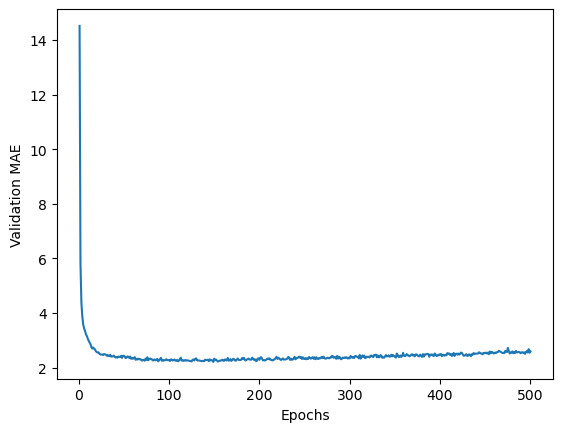

In [51]:
# §代碼清單 3-30 繪製驗證分數

import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()


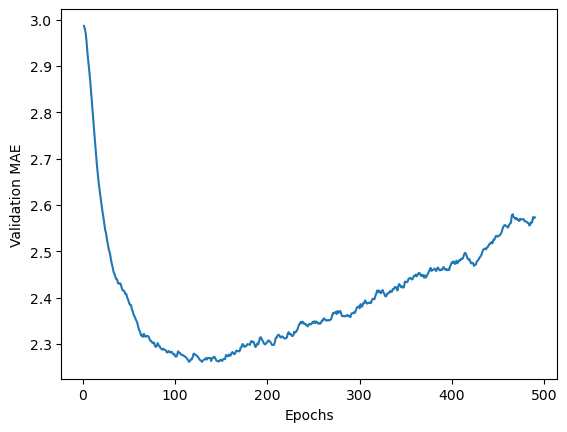

In [52]:
# §代碼清單 3-31 繪製驗證分數(刪除前10個數據點)

def smooth_curve(points, factor = 0.9) :
    smoothed_points = []
    for point in points :
        if smoothed_points :
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else :
            smoothed_points.append(point)
    return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()


In [53]:
# §代碼清單 3-32 訓練最終模型

model = build_model()
model.fit(train_data, train_targets,
         epochs = 80, batch_size = 16, verbose = 0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)


4/4 [==============================] - 0s 3ms/step - loss: 19.6890 - mae: 2.9014


In [55]:
print(test_mae_score)

2.9013752937316895
